In [1]:
import keras

Using TensorFlow backend.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
#全连接层
from keras.layers import Dense,Activation
from keras.optimizers import SGD

In [3]:
#生成数据
x_data = np.linspace(-0.5, 0.5, 200)
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

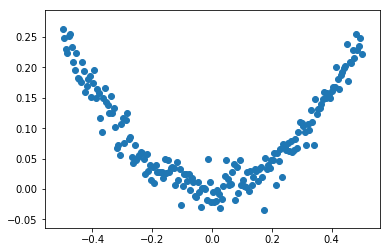

In [4]:
plt.scatter(x_data, y_data)
plt.show()

## 仍然用LR来构建

#构建模型
model = Sequential()
model.add(Dense(units=1, input_dim=1))
model.compile(optimizer='sgd', loss='mse')

#训练模型
for step in range(3001):
    #因为数据量比较小，因此每次放入所有的数据
    cost = model.train_on_batch(x_data, y_data)
    if step % 500 == 0:
        print("Cost:", cost)

W, b = model.layers[0].get_weights()

print(W, b)

y_pred = model.predict(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data,y_pred, 'r-',lw=3)
plt.show()

## 结果拟合不好

## 增加隐含层

In [21]:
#构建模型 1-10-1
model = Sequential() 
model.add(Dense(units=10, input_dim=1, activation='relu')) # H-Layer
#model.add(Activation('relu'))
model.add(Dense(units=1)) #这里的input_dim 可以不输入
#model.add(Activation('tanh'))


sgd = SGD(lr=0.3) #修改默认学习率
model.compile(optimizer=sgd, loss='mse') #sgd默认的learning rate 是0.01



In [22]:
#训练模型
for step in range(3001):
    #因为数据量比较小，因此每次放入所有的数据
    cost = model.train_on_batch(x_data, y_data)
    if step % 500 == 0:
        print("Cost:", cost)

W, b = model.layers[0].get_weights()

Cost: 0.052191153
Cost: 0.0006872884
Cost: 0.00043793145
Cost: 0.00035898975
Cost: 0.0003383921
Cost: 0.00033359093
Cost: 0.00033167386


In [23]:
y_pred = model.predict(x_data)

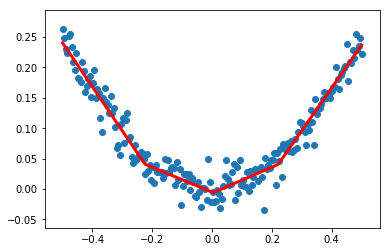

In [24]:
plt.scatter(x_data, y_data)
plt.plot(x_data,y_pred, 'r-',lw=3)
plt.show()